In [2]:
import pandas as pd

In [3]:
df_Comercio = pd.read_csv('../data/dados_tratados/Comercio.csv', sep=';')
df_Comercio.head()

,Tipo,Produto,Ano,Quantidade
0,VINHO DE MESA,VINHO DE MESA,1970,98327606
1,vm_Tinto,Tinto,1970,83300735
2,vm_Rosado,Rosado,1970,107681
3,vm_Branco,Branco,1970,14919190
4,VINHO FINO DE MESA,VINHO FINO DE MESA,1970,4430629


In [4]:
df_Completo = pd.read_csv('../data/dados_tratados/Completo.csv', sep=';')
df_Completo.head()

,Tipo,Produto,País,Ano,Quantidade (Kg),Valor (US$)
0,Exportação,Espumantes,Alemanha,1970,0,0.0
1,Exportação,Espumantes,Angola,1970,0,0.0
2,Exportação,Espumantes,Antigua e Barbuda,1970,0,0.0
3,Exportação,Espumantes,Antilhas Holandesas,1970,0,0.0
4,Exportação,Espumantes,Argentina,1970,0,0.0


In [5]:
df_Processamento = pd.read_csv('../data/dados_tratados/Processamento.csv', sep=';')
df_Processamento.head()

,index,control,cultivar,Tipo,Produto,Ano,Quantidade (Kg)
0,0,TINTAS,TINTAS,Processamento,Uva Americana,1970,284285642
1,1,ti_Bacarina,Bacarina,Processamento,Uva Americana,1970,82899
2,2,ti_Bailey,Bailey,Processamento,Uva Americana,1970,0
3,3,ti_Bordo,Bordo,Processamento,Uva Americana,1970,7242197
4,4,ti_Bourdin (S),Bourdin (S),Processamento,Uva Americana,1970,0


In [6]:
df_Producao = pd.read_csv('../data/dados_tratados/Producao.csv', sep=';')
df_Producao.head()

,Tipo,Produto,Ano,Quantidade
0,VINHO DE MESA,VINHO DE MESA,1970,217208604
1,vm_Tinto,Tinto,1970,174224052
2,vm_Branco,Branco,1970,748400
3,vm_Rosado,Rosado,1970,42236152
4,VINHO FINO DE MESA (VINÍFERA),VINHO FINO DE MESA (VINÍFERA),1970,23899346


# Gráficos do DataFrame Completo de Importação e Exportação

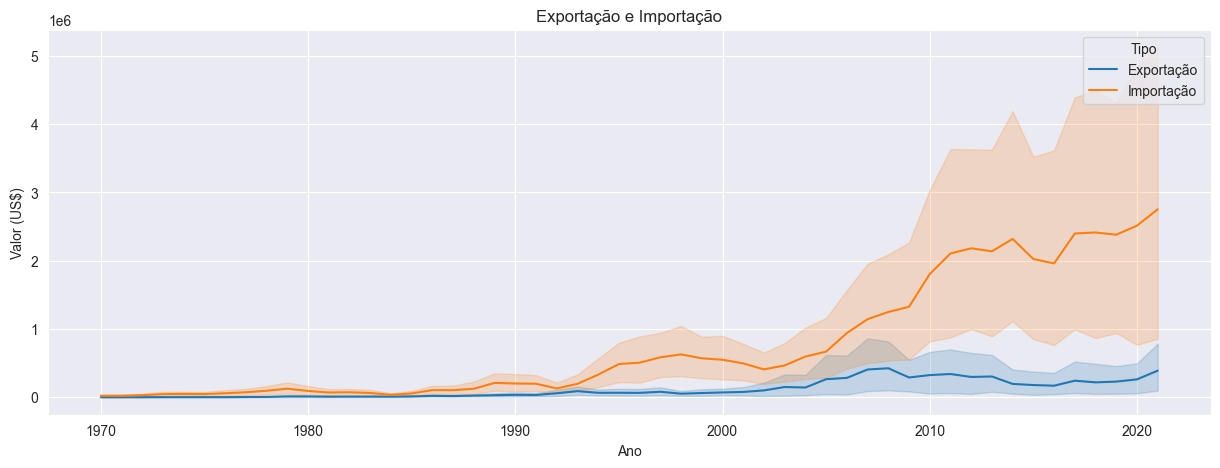

In [7]:
#  graph time series df_Completo compare Tipo Exportação e Importação
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('Exportação e Importação')
sns.lineplot(x='Ano', y='Valor (US$)', hue='Tipo', data=df_Completo)
plt.show()

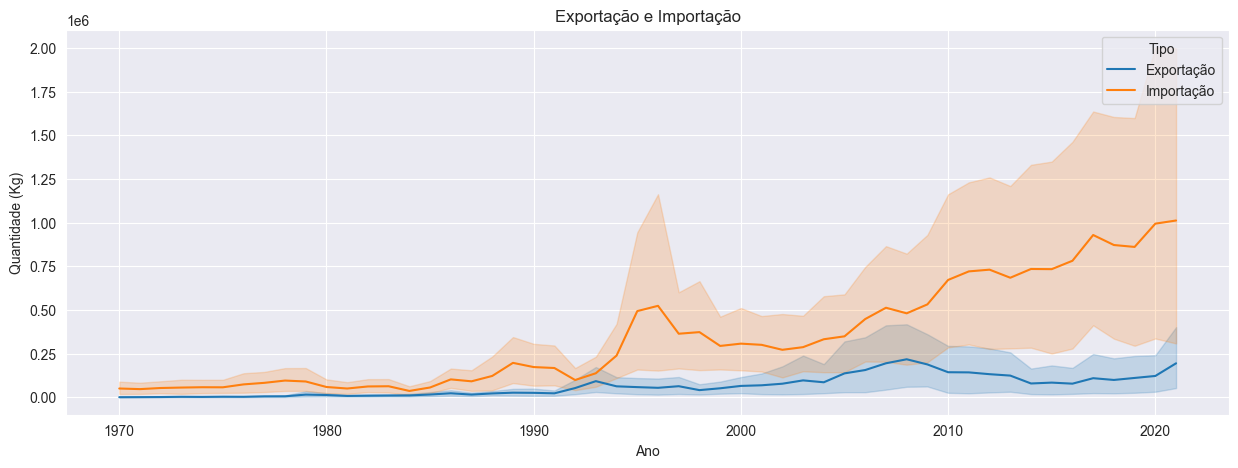

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('Exportação e Importação')
sns.lineplot(x='Ano', y='Quantidade (Kg)', hue='Tipo', data=df_Completo)
plt.show()

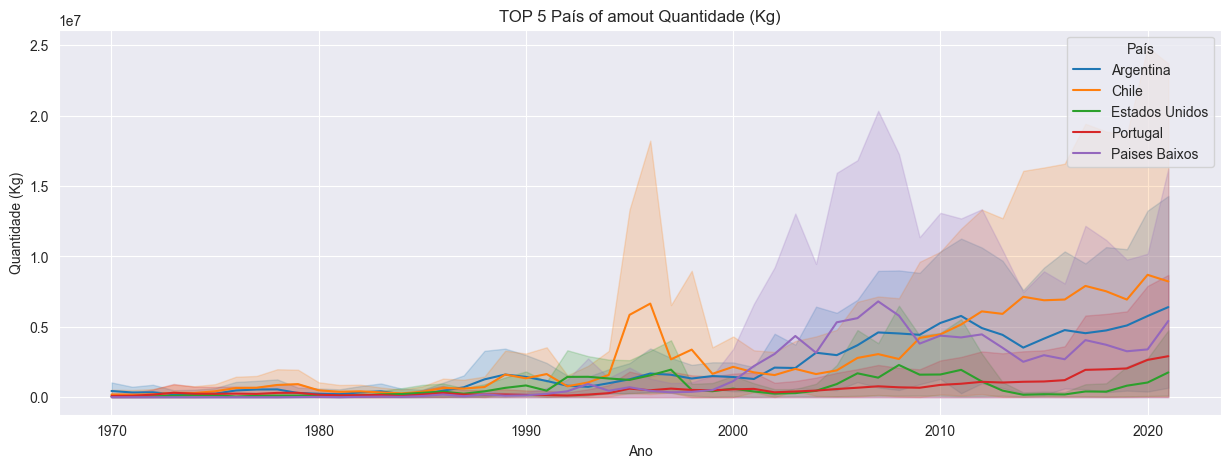

In [9]:
#  graph time series df_Completo compare the TOP 5 País of amout Quantidade (Kg)
TOP_5_Pais = df_Completo.groupby('País')['Quantidade (Kg)'].sum().sort_values(ascending=False).head(5).index
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('TOP 5 País of amout Quantidade (Kg)')
sns.lineplot(x='Ano', y='Quantidade (Kg)', hue='País', data=df_Completo[df_Completo['País'].isin(TOP_5_Pais)])
plt.show()


In [10]:
df_Completo.describe()

,Ano,Quantidade (Kg),Valor (US$)
count,33644.000000,3.364400e+04,3.364300e+04
mean,1995.500000,1.469682e+05,3.089160e+05
std,15.008554,1.512512e+06,3.570662e+06
min,1970.000000,0.000000e+00,0.000000e+00
25%,1982.750000,0.000000e+00,0.000000e+00
50%,1995.500000,0.000000e+00,0.000000e+00
75%,2008.250000,0.000000e+00,0.000000e+00
max,2021.000000,7.272619e+07,1.825681e+08


In [11]:
df_Completo['Produto'].unique()

array(['Espumantes', 'Suco', 'Uva', 'Vinho', 'Uva Fresca', 'Uva Passa'],
      dtype=object)

In [12]:
#last 15 years
anos = df_Completo['Ano'].unique()
anos = anos[-15:]
anos

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021], dtype=int64)

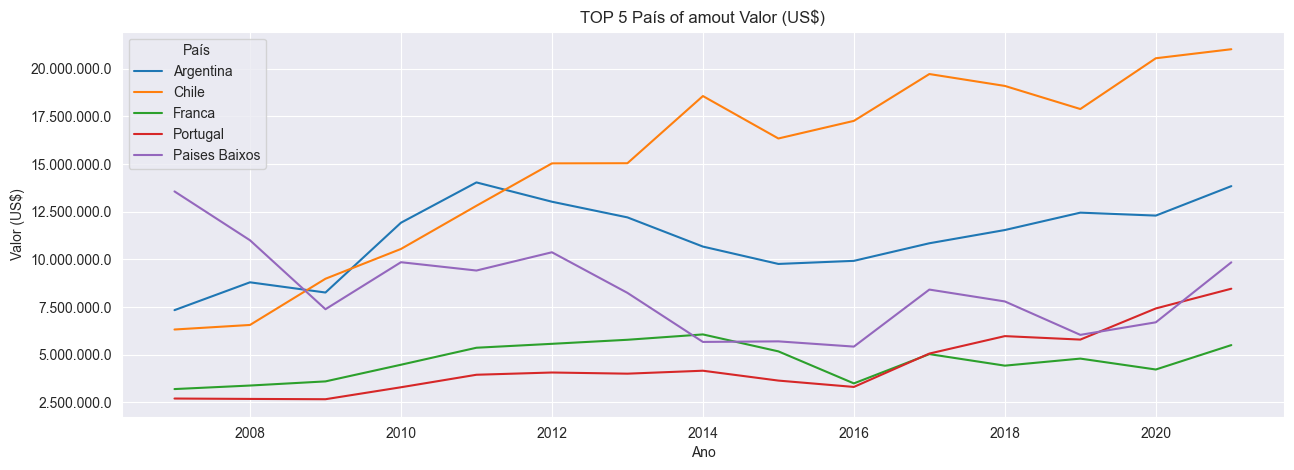

In [13]:
#  graph time series df_Completo compare the TOP 5 País of amout Valor (US$) filter Ano that have Valor bigger than the mean
import matplotlib.ticker as ticker
Years_With_Valor_Bigger_Than_Mean = anos
TOP_5_Pais = df_Completo.groupby('País')['Valor (US$)'].sum().sort_values(ascending=False).head(5).index
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('TOP 5 País of amout Valor (US$)')
plt.ticklabel_format(style='plain', axis='both')
formatter = ticker.FuncFormatter(lambda x, pos: "{:,}".format(x).replace(",", "."))
plt.gca().yaxis.set_major_formatter(formatter)
sns.lineplot(x='Ano', y='Valor (US$)', errorbar=None, hue='País', data=df_Completo[df_Completo['País'].isin(TOP_5_Pais) 
                                                                    & df_Completo['Ano'].isin(Years_With_Valor_Bigger_Than_Mean)])
plt.show()

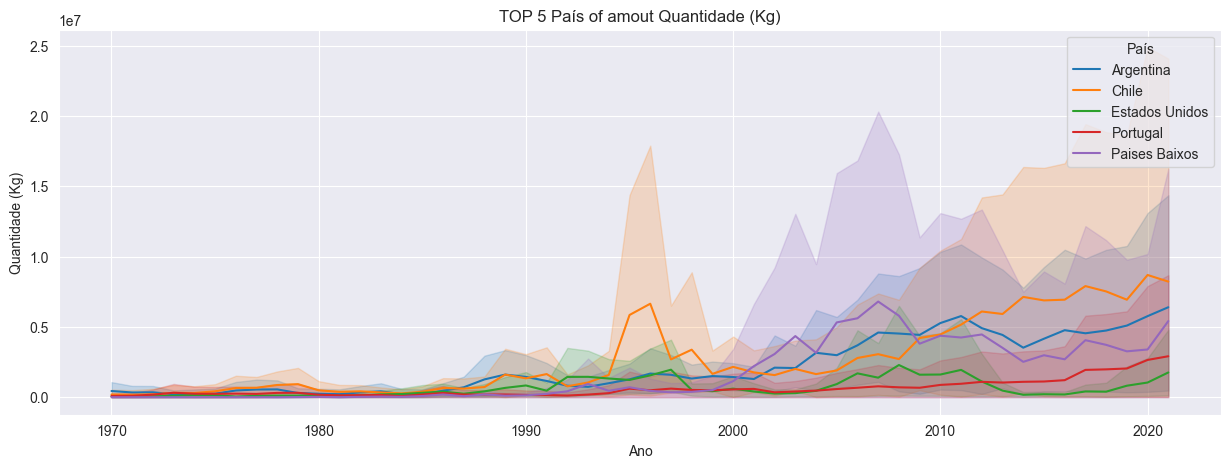

In [14]:
#  graph time series df_Completo compare the TOP 5 País of amout Quantidade (Kg)
TOP_5_Pais = df_Completo.groupby('País')['Quantidade (Kg)'].sum().sort_values(ascending=False).head(5).index
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('TOP 5 País of amout Quantidade (Kg)')
sns.lineplot(x='Ano', y='Quantidade (Kg)', hue='País', data=df_Completo[df_Completo['País'].isin(TOP_5_Pais)])
plt.show()

O PROBLEMA

Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo. Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:

1. Dados climáticos.
2. Dados demográficos.
3. Dados económicos.
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construisse uma tabela contendo as seguintes informações:

1. País de origem (Brasil)
2. País de destino.
3. Quantidade em litros de vinho exportado (utilize 1KG =1L).
4. Valor em US$.

Os dados que lhe forneceram são de uma vinícola parceira, e podem ser encontrados aqui.
Seu objetivo é dizer o montante de venda de exportação nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações. Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.

DICA

Para construir uma boa análise, utilize várias bases do mesmo site! Outro ponto interessante, é utilizar os dados externos citados acima para enriquecer ainda mais a mensagem que você quer passar.
Lembre-se de que você poderá apresentar o desenvolvimento do seu projeto durante as lives com docentes no Discord! Essa é uma boa oportunidade para discutir sobre as dificuldades encontradas e pegar dicas valiosas com especialistas e colegas de turma.

In [15]:
#create a column 'País de origem' and 'País de destino' if the column 'Tipo' is 'Exportação' then 'País de origem' is 'Brasil' else 'País de destino' is 'Brasil'
df_Completo['País de origem'] = df_Completo.apply(lambda x: 'Brasil' if x['Tipo'] == 'Exportação' else x['País'], axis=1)
df_Completo['País de destino'] = df_Completo.apply(lambda x: 'Brasil' if x['Tipo'] == 'Importação' else x['País'], axis=1)
df_Completo.head()


,Tipo,Produto,País,Ano,Quantidade (Kg),Valor (US$),País de origem,País de destino
0,Exportação,Espumantes,Alemanha,1970,0,0.0,Brasil,Alemanha
1,Exportação,Espumantes,Angola,1970,0,0.0,Brasil,Angola
2,Exportação,Espumantes,Antigua e Barbuda,1970,0,0.0,Brasil,Antigua e Barbuda
3,Exportação,Espumantes,Antilhas Holandesas,1970,0,0.0,Brasil,Antilhas Holandesas
4,Exportação,Espumantes,Argentina,1970,0,0.0,Brasil,Argentina


In [16]:

df_Completo['Quantidade (Kg)'] = df_Completo['Quantidade (Kg)'].astype(float)
pd.options.display.float_format = '{:,.2f}'.format
#ordenar por mais quantidade e valor
#filtrar apenas pais de origem brasil e Produto Vinho e apenas ultimos 15 anos
df_filtro = df_Completo[(df_Completo['País de origem'] == 'Brasil') & (df_Completo['Produto'] == 'Vinho') & (df_Completo['Ano'].isin(df_Completo['Ano'].unique()[-15:]))].sort_values(by=['Quantidade (Kg)', 'Valor (US$)'], ascending=False)
#df_filtro tabela com País de origem, País de destino, quantidade em livro de vinho exportado e valor em US$
df_filtro = df_filtro[['País de origem', 'País de destino', 'Quantidade (Kg)', 'Valor (US$)']]
#agrupar por País de destino e somar quantidade e valor e ordenar por quantidade e valor
df_filtro = df_filtro.groupby(['País de origem', 'País de destino']).sum().sort_values(by=['Quantidade (Kg)', 'Valor (US$)'], ascending=False)
df_filtro.head(10)



Quantidade (Kg)   Valor (US$)
País de origem País de destino                                               
Brasil         Russia                             39,230,153.00 25,559,026.00
               Paraguai                           25,423,559.00 32,364,257.00
               Estados Unidos                      3,822,251.00 10,046,712.00
               China                               2,411,701.00  4,372,268.00
               Espanha                             1,993,000.00  3,808,552.00
               Japao                               1,502,311.00  2,612,375.00
               Paises Baixos                       1,410,166.00  4,119,122.00
               Reino Unido                         1,305,329.00  4,717,554.00
               Haiti                               1,238,100.00  1,586,194.00
               Alemanha, Republica Democratica     1,020,933.00  2,739,079.00

In [17]:
df_Completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33644 entries, 0 to 33643
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tipo             33644 non-null  object 
 1   Produto          33644 non-null  object 
 2   País             33644 non-null  object 
 3   Ano              33644 non-null  int64  
 4   Quantidade (Kg)  33644 non-null  float64
 5   Valor (US$)      33643 non-null  float64
 6   País de origem   33644 non-null  object 
 7   País de destino  33644 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.1+ MB


In [32]:
#total Valor (US$) the Exportação print formatado
print('Total Valor (US$) the Exportação: {:,.2f}'.format(df_Completo[df_Completo['Tipo'] == 'Exportação']['Valor (US$)'].sum()))

Total Valor (US$) the Exportação: 2,807,010,275.00


In [33]:
#valor de 80% total Valor (US$) the Exportação print formatado
print('80% total Valor (US$) the Exportação: {:,.2f}'.format(df_Completo[df_Completo['Tipo'] == 'Exportação']['Valor (US$)'].sum() * 0.8))

80% total Valor (US$) the Exportação: 2,245,608,220.00


In [30]:
#top 5 País of amout Valor (US$) the Exportação
#last 15 years
anos = df_Completo['Ano'].unique()
# anos = anos[-15:]
last_15_years = anos
data_last_15_years = df_Completo[df_Completo['Ano'].isin(last_15_years)]
#top 5 País of amout Valor (US$) the Exportação
top_5_Pais = data_last_15_years[data_last_15_years['Tipo'] == 'Exportação'].groupby('País')['Valor (US$)'].sum().sort_values(ascending=False).head(5)
top_5_Pais

País
Paises Baixos    1,023,966,288.00
Reino Unido        554,532,228.00
Estados Unidos     489,346,042.00
Japao              191,261,441.00
Paraguai            82,502,576.00
Name: Valor (US$), dtype: float64

In [35]:
#porcentagem de importação e exportação
#total Valor (US$) the Exportação
total_Valor_US_Exportacao = data_last_15_years[data_last_15_years['Tipo'] == 'Exportação']['Valor (US$)'].sum()
#total Valor (US$) the Importação
total_Valor_US_Importacao = data_last_15_years[data_last_15_years['Tipo'] == 'Importação']['Valor (US$)'].sum()
#porcentagem de importação e exportação
porcentagem_Valor_US_Exportacao = total_Valor_US_Exportacao / (total_Valor_US_Exportacao + total_Valor_US_Importacao)
porcentagem_Valor_US_Importacao = total_Valor_US_Importacao / (total_Valor_US_Exportacao + total_Valor_US_Importacao)
print('Porcentagem de Exportação: {:.2%}'.format(porcentagem_Valor_US_Exportacao))
print('Porcentagem de Importação: {:.2%}'.format(porcentagem_Valor_US_Importacao))

Porcentagem de Exportação: 27.01%
Porcentagem de Importação: 72.99%


In [63]:
#dados do País Russia e Produto Vinho e Exportação ultiimos 15 anos
_ = df_Completo.query('País == "Russia" & Produto == "Vinho" & Tipo == "Exportação" & Ano >= 2000')['Valor (US$)'].sum()
#print formatado
print('Valor (US$) Exportação para Russia: {:,.2f}'.format(_))

Valor (US$) Exportação para Russia: 25,795,758.00


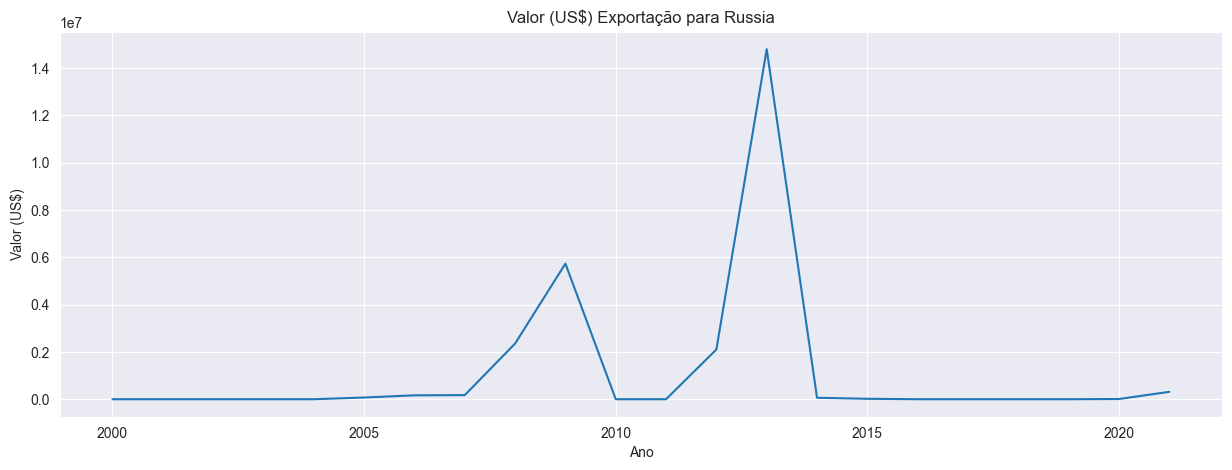

In [64]:
#gráfico do País Russia e Produto Vinho e Exportação ultiimos 15 anos
_ = df_Completo.query('País == "Russia" & Produto == "Vinho" & Tipo == "Exportação" & Ano >= 2000')
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.title('Valor (US$) Exportação para Russia')
sns.lineplot(x='Ano', y='Valor (US$)', data=_)
plt.show()